In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
# full_df = pd.read_csv('Data/Final_NBA_PLayers.csv', index_col = 0)
# df = pd.read_csv('Data/Final_NBA_Seasons1-3.csv', index_col = 0)
df_final = pd.read_csv('Data/Final_NBA_Seasons1-3_1977_final.csv', index_col = 0)
df_final.set_index('Player', inplace = True)

In [3]:
df_final.head()

,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,...,DWS_1-2,DWS_2-3,PER_1-2,PER_2-3,USG_1-2,USG_2-3,VORP_1-2,VORP_2-3,target,Qualified
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green\greenac01,243,137.0,6418.0,847,1615,846,1602,1.0,13.0,615,...,1.3,0.1,3.9,-1.2,0.0,0.0,1.5,-0.2,0,1.0
A.J. Price\priceaj01,150,3.0,2228.0,318,848,191,437,127.0,411.0,142,...,-0.1,-0.2,-3.3,0.8,0.0,-5.0,-0.5,0.3,0,1.0
Aaron Brooks\brookaa01,213,117.0,5525.0,984,2339,626,1396,358.0,943.0,436,...,1.4,-0.6,-0.2,3.1,1.1,2.8,0.3,1.3,0,1.0
Aaron Gordon\gordoaa01,205,117.0,4958.0,760,1652,628,1195,132.0,457.0,329,...,1.5,-0.5,5.6,-2.5,1.8,2.8,1.6,-0.8,0,1.0
Aaron Gray\grayaa01,149,19.0,1639.0,226,453,226,451,0.0,2.0,110,...,0.0,-0.4,-2.4,5.1,-7.5,1.9,0.0,0.3,0,1.0


In [4]:
df_final['target'].value_counts()

0    1183
1      90
Name: target, dtype: int64

<AxesSubplot:xlabel='PTS', ylabel='WS_3'>

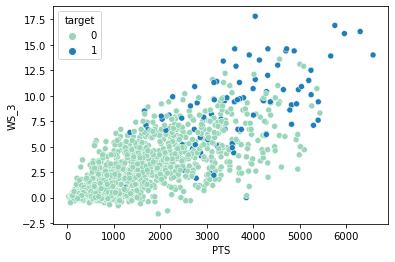

In [5]:
sns.scatterplot(x = df_final.PTS, y = df_final.WS_3, hue = df_final['target'], palette = 'YlGnBu')

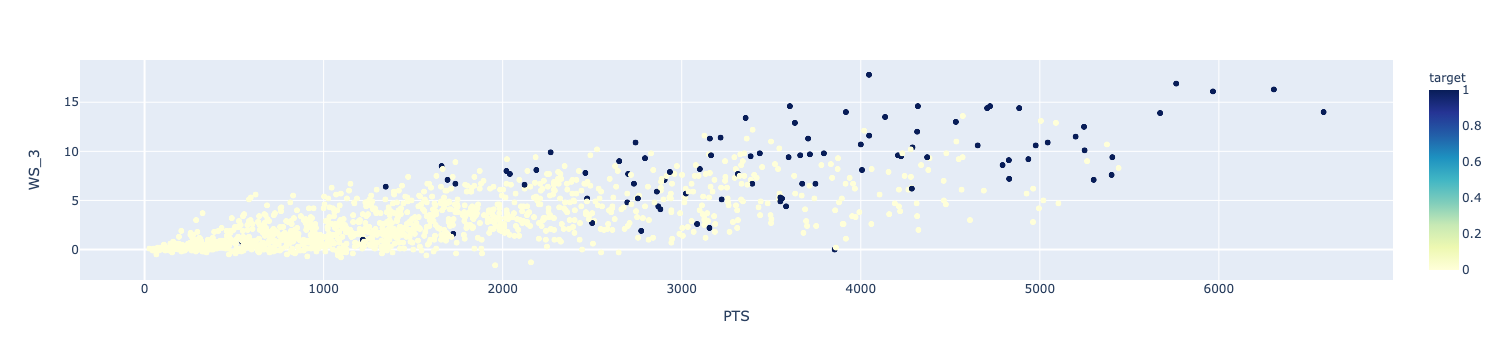

In [30]:
px.scatter(df_final, x = 'PTS', y ='WS_3', color = 'target', color_continuous_scale='YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='PER_3'>

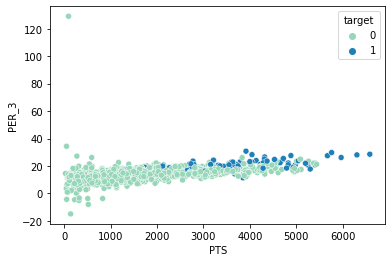

In [6]:
sns.scatterplot(x = df_final.PTS, y = df_final.PER_3, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='WS_3', ylabel='VORP_3'>

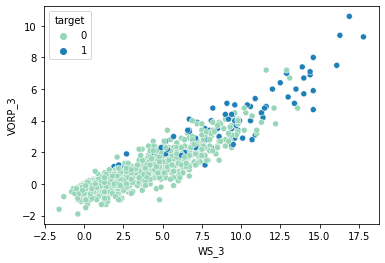

In [7]:
sns.scatterplot(x = df_final.WS_3, y = df_final.VORP_3, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='G'>

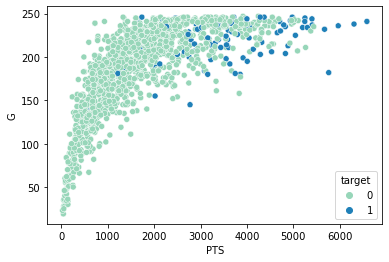

In [24]:
sns.scatterplot(x = df_final.PTS, y = df_final.G, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='GS'>

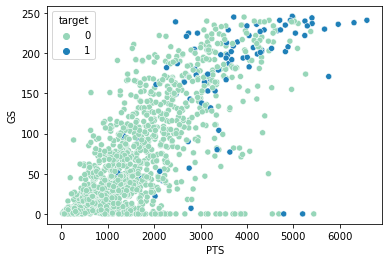

In [23]:
sns.scatterplot(x = df_final.PTS, y = df_final.GS, hue = df_final['target'], palette = 'YlGnBu')

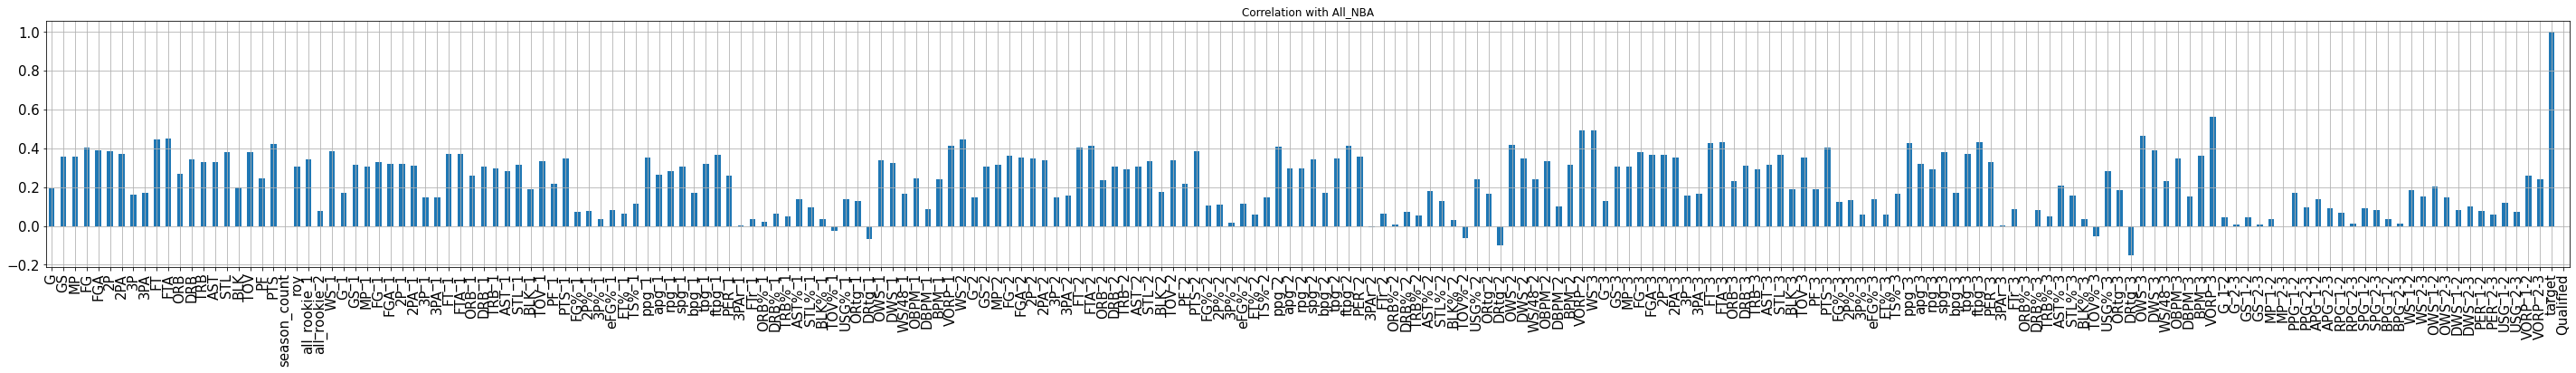

In [10]:
df_final.corrwith(df_final.target).plot.bar(figsize = (50, 5), title = "Correlation with All_NBA", 
                                        fontsize = 15,rot = 90, grid = True);

In [11]:
cols = ['GS','MP','FG','FGA','2P','2PA','FT','FTA','ORB','DRB','TRB','AST','STL','TOV','PTS','roy','all_rookie_1','WS_1','G_1','GS_1','MP_1','FG_1','FGA_1','2P_1',
        '2PA_1','3P_1','3PA_1','FT_1','FTA_1','ORB_1','DRB_1','TRB_1','AST_1','STL_1','BLK_1','TOV_1','PF_1','PTS_1','FG%_1','ppg_1','apg_1','rpg_1','spg_1','bpg_1',
        'tpg_1','ftpg_1','PER_1','OWS_1','DWS_1','WS/48_1','OBPM_1','DBPM_1','BPM_1','VORP_1','WS_2','G_2','GS_2','MP_2','FG_2','FGA_2','2P_2','2PA_2','3P_2','3PA_2',
        'FT_2','FTA_2','ORB_2','DRB_2','TRB_2','AST_2','STL_2','BLK_2','TOV_2','PF_2','PTS_2','ppg_2','apg_2','rpg_2','spg_2','bpg_2','tpg_2','ftpg_2','PER_2','USG%_2',
        'ORtg_2','DRtg_2','OWS_2','DWS_2','WS/48_2','OBPM_2','DBPM_2','BPM_2','VORP_2','WS_3','G_3','GS_3','MP_3','FG_3','FGA_3','2P_3','2PA_3','3P_3','3PA_3','FT_3',
        'FTA_3','ORB_3','DRB_3','TRB_3','AST_3','STL_3','BLK_3','TOV_3','PF_3','PTS_3','TS%_3','ppg_3','apg_3','rpg_3','spg_3','bpg_3','tpg_3','ftpg_3','PER_3','USG%_3',
        'ORtg_3','DRtg_3','OWS_3','DWS_3','WS/48_3','OBPM_3','DBPM_3','BPM_3','VORP_3','target',]

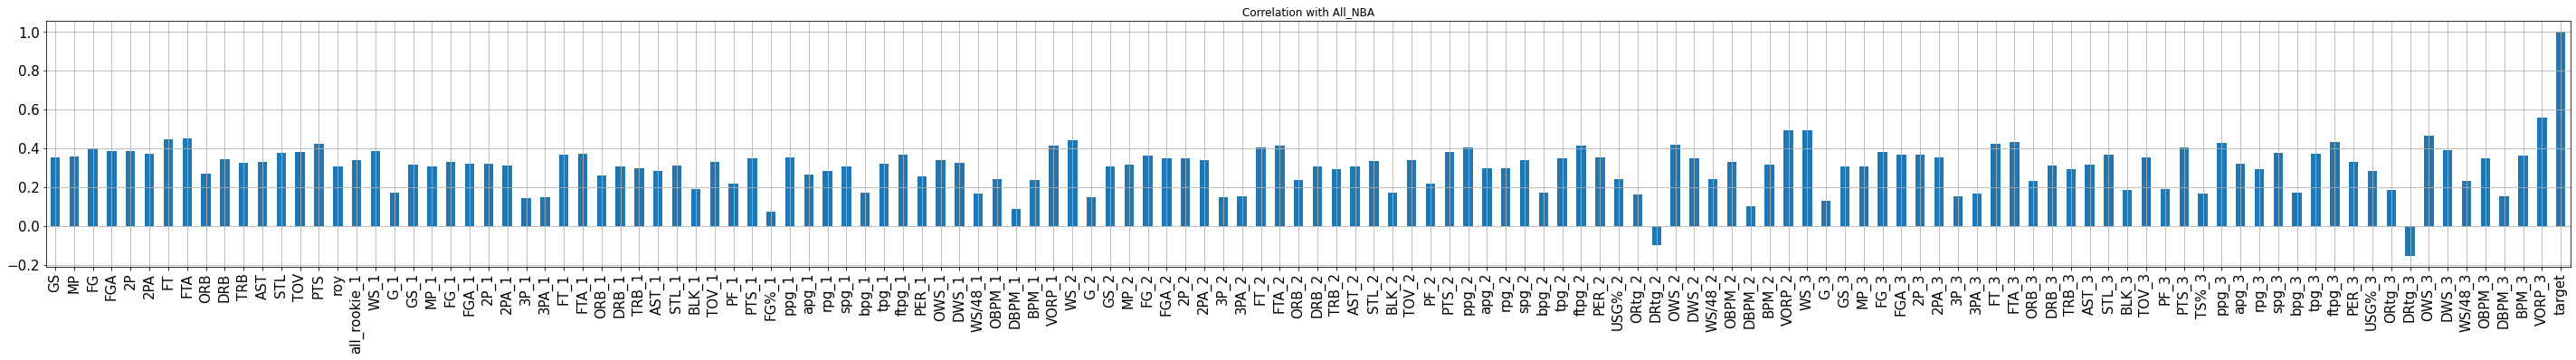

In [12]:
df_final[cols].corrwith(df_final[cols].target).plot.bar(figsize = (50, 5), title = "Correlation with All_NBA", 
                                        fontsize = 15,rot = 90, grid = True);

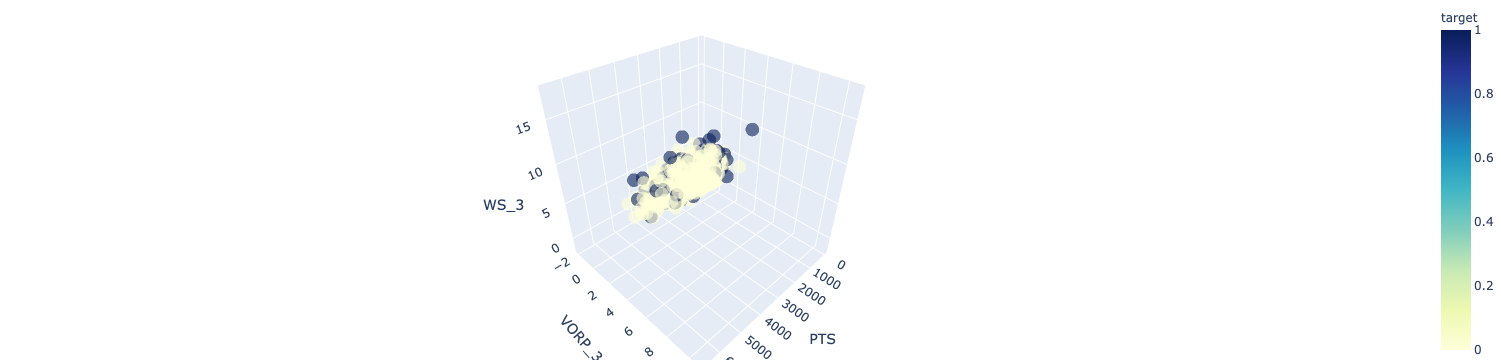

In [15]:
fig = px.scatter_3d(df_final, x='PTS', y='VORP_3', z='WS_3', color='target', size_max=10, opacity=0.6,\
                   color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<AxesSubplot:xlabel='target', ylabel='PTS'>

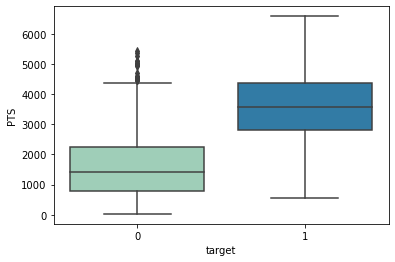

In [25]:
sns.boxplot(x = df_final['target'], y = df_final['PTS'], palette = 'YlGnBu')

<AxesSubplot:xlabel='target', ylabel='GS'>

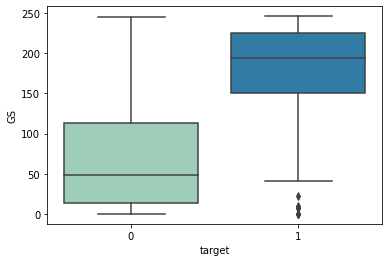

In [26]:
sns.boxplot(x = df_final['target'], y = df_final['GS'], palette = 'YlGnBu')

<AxesSubplot:xlabel='target', ylabel='G'>

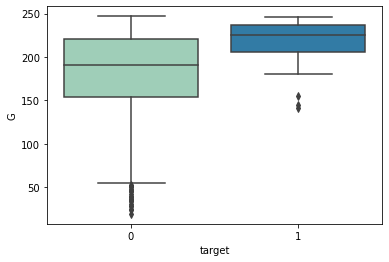

In [27]:
sns.boxplot(x = df_final['target'], y = df_final['G'], palette = 'YlGnBu')